# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [1]:
from sklearn import tree 
import os
os.environ["PATH"] += os.pathsep + '/home/matteo/Documenti/AAUT//'

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [2]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]] #esempi del dataset
Y = [1, 0, 0, 0, 1, 1] #classe per ogni esempio sopra inserito

Declare the classification model you want to use and then fit the model to the data

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [4]:
print(clf.predict([[0, 1, 1]]))

[0]


In [5]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


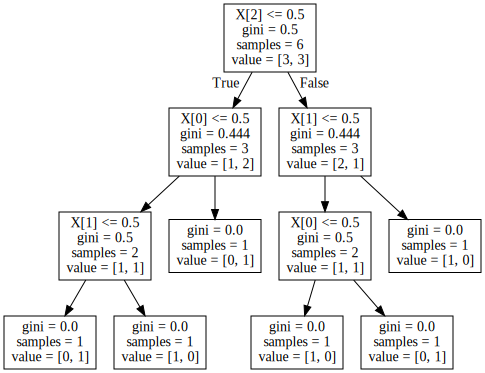

In [6]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [8]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [9]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data)) #permutazione di interi da 0 a len(iris.data) 

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10] #tutti gli elementi eccetto gli ultimi 10
indices_test=indices[-10:] #solo ultimi 10 elementi di indices

#abbiamo scelto 140 dei 150 di iris come training set, 10 rimanenti come test set
iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# Fit the learning model on training set

In [10]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [11]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [12]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [13]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test)+": ") #indici delle istanze su cui ho fatto il test
    s=""
    for j in range(len(iris.feature_names)): 
        #iris.feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=4.9, sepal width (c

# Obtain model performance results

In [14]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro') #F1 = 2 * (precision * recall) / (precision + recall)
                                                            #recall = TP/(TP+FN)
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [16]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [17]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [18]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


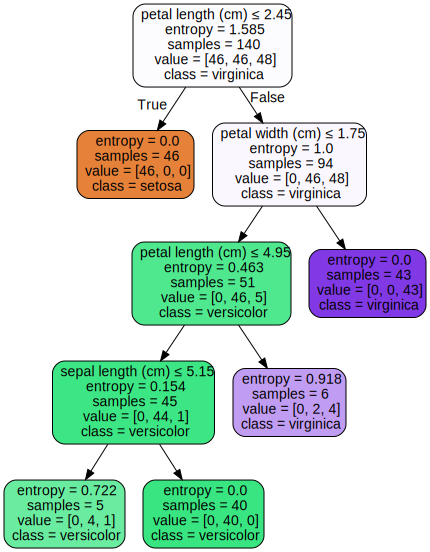

In [26]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


# Esercizi

1) Get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions.

In [20]:
iris = load_iris()
#0 'setosa'; 1 'versicolor'; 2 'virginica'
#clf1: peso maggiore a versicolor e a virginica
clf1 = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=50,class_weight={0:10,1:1000,2:1000})

np.random.seed(0)
indices = np.random.permutation(len(iris.data)) #permutazione di interi da 0 a len(iris.data) 

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10] #tutti gli elementi eccetto gli ultimi 10
indices_test=indices[-10:] #solo ultimi 10 elementi di indices

#abbiamo scelto 140 el random dei 150 di iris come training set, 10 rimanenti come test set
iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# fit the model to the training data
clf1 = clf1.fit(iris_X_train, iris_y_train)

# apply fitted model "clf" to the test set 
predicted_y_test_unbalanced = clf1.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test_unbalanced)
print("True classes:")
print(iris_y_test) 
print()

dot_data = tree.export_graphviz(clf1, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
#graph

Predictions:
[1 2 1 1 1 1 2 1 2 1]
True classes:
[1 1 1 0 0 0 2 1 2 0]



3) Learn trees but avoid overfitting (by improving the error on the test set) tuning the parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.

Predictions:
[1 2 1 0 0 1 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]


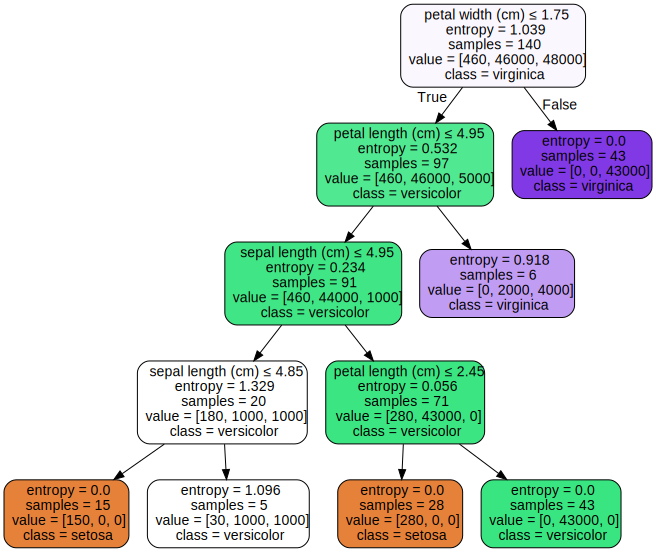

In [28]:
iris = load_iris()
#clf2: come clf1 ma gestisce l'overfitting
clf2 = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:10,1:1000,2:1000})

clf2 = clf2.fit(iris_X_train, iris_y_train)

predicted_y_test_balanced = clf2.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test_balanced)
print("True classes:")
print(iris_y_test) 
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

4) Build the confusion matrix of the created tree models on the test set and show them.

In [22]:
import pandas as pd

clf = clf.fit(iris_X_train, iris_y_train)
clf1 = clf1.fit(iris_X_train, iris_y_train)
clf2 = clf2.fit(iris_X_train, iris_y_train)

def generateConfusionMatrixIris(actual, predicted):
    i=0
    confusionMatrix = np.zeros((3,3), dtype=int)
    if(len(actual)==len(predicted)):
        while(i<len(actual)):
            confusionMatrix[actual[i], predicted[i]]+=1
            i=i+1
    return confusionMatrix

print("True value = " + str(iris_y_test))
print("Good prediction = " + str(predicted_y_test))
print("Unbalanced prediction = " + str(predicted_y_test_unbalanced))
print("Balanced prediction = " + str(predicted_y_test_balanced))

conf_matrix_unbalanced = generateConfusionMatrixIris(iris_y_test, predicted_y_test_unbalanced)
conf_matrix_balanced = generateConfusionMatrixIris(iris_y_test, predicted_y_test_balanced)
conf_matrix_good = generateConfusionMatrixIris(iris_y_test, predicted_y_test)

#0 'setosa'; 1 'versicolor'; 2 'virginica'
index = ["setosa (act)", "versicolor (act)", "virginica (act)"]
columns = ["setosa (pred)", "versicolor (pred)", "virginica (pred)"]
print("Confusion Matrix Unbalanced")
print(pd.DataFrame(conf_matrix_unbalanced, index, columns))
print("\nConfusion Matrix Balanced")
print(pd.DataFrame(conf_matrix_balanced, index, columns))
print("\nConfusion Matrix Good")
print(pd.DataFrame(conf_matrix_good, index, columns))


True value = [1 1 1 0 0 0 2 1 2 0]
Good prediction = [1 2 1 0 0 0 2 1 2 0]
Unbalanced prediction = [1 2 1 1 1 1 2 1 2 1]
Balanced prediction = [1 2 1 0 0 1 2 1 2 0]
Confusion Matrix Unbalanced
                  setosa (pred)  versicolor (pred)  virginica (pred)
setosa (act)                  0                  4                 0
versicolor (act)              0                  3                 1
virginica (act)               0                  0                 2

Confusion Matrix Balanced
                  setosa (pred)  versicolor (pred)  virginica (pred)
setosa (act)                  3                  1                 0
versicolor (act)              0                  3                 1
virginica (act)               0                  0                 2

Confusion Matrix Good
                  setosa (pred)  versicolor (pred)  virginica (pred)
setosa (act)                  4                  0                 0
versicolor (act)              0                  3                 

5) Build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

In [23]:
import operator
def getLeafes(clf):
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    n_nodes = clf.tree_.node_count
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = []
    leaves = []
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves.append(node_id)
    
    for i in is_leaves:
        leaves.append(clf.tree_.value[i])
        
    return leaves

def orderBy(leafes, pos):
    empProb = []
    for leaf in leafes:
        sumLe = sum(leaf[0])
        empProb.append(leaf[0][pos]/sumLe)
    
    lista = [k for k, v in sorted(zip(leafes, empProb), key=operator.itemgetter(1))]
    lista.reverse()
    return lista
    
    
leafesBalanced = getLeafes(clf)
leafesUnBalanced = getLeafes(clf1)
leafesGood = getLeafes(clf2)

#print leafesBalanced
#print leafesUnBalanced
#print leafesGood

leafesB_0 = orderBy(leafesBalanced,0)
leafesB_1 = orderBy(leafesBalanced,1)
leafesB_2 = orderBy(leafesBalanced,2)

leafesG_0 = orderBy(leafesGood,0)
leafesG_1 = orderBy(leafesGood,1)
leafesG_2 = orderBy(leafesGood,2)

leafesU_0 = orderBy(leafesUnBalanced,0)
leafesU_1 = orderBy(leafesUnBalanced,1)
leafesU_2 = orderBy(leafesUnBalanced,2)



46.0


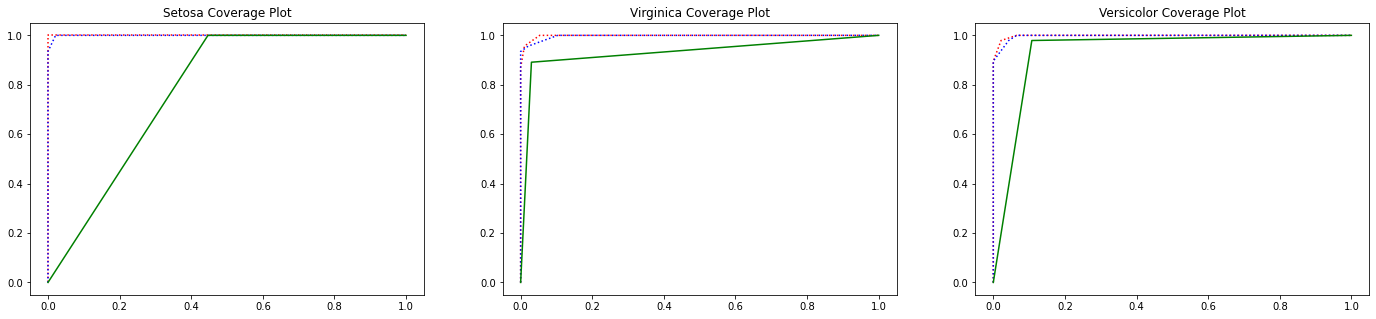

In [27]:
import matplotlib.pyplot as plt

def totals(leafes, pos):
    sumtot = 0
    negtot = 0
    for leaf in leafes:
        for i in range(0, 3):
            if(i==pos):
                sumtot = sumtot + leaf[0][i]
            else:
                negtot = negtot + leaf[0][i]
        
    return sumtot, negtot
    

fig, axs = plt.subplots(1,3, figsize=(24,5))


########################SETOSA######################################
pos = 0 
neg = 0
sumtot, negtot = totals(leafesB_0, 0)
x = [0]
y = [0]
for point in leafesB_0:
    axs[0].set_title("Setosa Coverage Plot")
    pos = point[0][0] + pos
    neg = point[0][1] + point[0][2] + neg
    x.append(neg/negtot)
    y.append(pos/sumtot)
axs[0].plot(x, y, color='red',linestyle=':') 
####################################################################
pos = 0 
neg = 0
sumtot, negtot = totals(leafesG_0, 0)
x = [0]
y = [0]
for point in leafesG_0:
    axs[0].set_title("Setosa Coverage Plot")
    pos = point[0][0] + pos
    neg = point[0][1] + point[0][2] + neg
    x.append(neg/negtot)
    y.append(pos/sumtot)
axs[0].plot(x, y, color='blue',linestyle=':') 
########################################################################
pos = 0 
neg = 0
x = [0]
y = [0]
sumtot, negtot = totals(leafesU_0, 0)
for point in leafesU_0:
    axs[0].set_title("Setosa Coverage Plot")
    pos = point[0][0] + pos
    neg = point[0][1] + point[0][2] + neg
    x.append(neg/negtot)
    y.append(pos/sumtot)
axs[0].plot(x, y, color='green',linestyle='-') 






#######################################################################    
########################VIRGINICA######################################
pos = 0 
neg = 0
x = [0]
y = [0]
sumtot, negtot = totals(leafesB_1, 1)
print(sumtot)
for point in leafesB_1:
    axs[1].set_title("Virginica Coverage Plot")
    pos = point[0][1] + pos
    neg = point[0][0] + point[0][2] + neg
    x.append(neg/negtot)
    y.append(pos/sumtot)
axs[1].plot(x, y, color='red',linestyle=':') 
####################################################################
pos = 0 
neg = 0
x = [0]
y = [0]
sumtot, negtot = totals(leafesG_1, 1)
for point in leafesG_1:
    axs[1].set_title("Virginica Coverage Plot")
    pos = point[0][1] + pos
    neg = point[0][0] + point[0][2] + neg
    x.append(neg/negtot)
    y.append(pos/sumtot)
axs[1].plot(x, y, color='blue',linestyle=':') 
########################################################################
pos = 0 
neg = 0
x = [0]
y = [0]
sumtot, negtot = totals(leafesU_1, 1)
for point in leafesU_1:
    axs[1].set_title("Virginica Coverage Plot")
    pos = point[0][1] + pos
    neg = point[0][0] + point[0][2] + neg
    x.append(neg/negtot)
    y.append(pos/sumtot)
axs[1].plot(x, y, color='green',linestyle='-') 

#######################################################################    
########################VERSICOLOR######################################
pos = 0 
neg = 0
sumtot, negtot = totals(leafesB_2, 2)
x = [0]
y = [0]
for point in leafesB_2:
    axs[2].set_title("Versicolor Coverage Plot")
    pos = point[0][2] + pos
    neg = point[0][0] + point[0][1] + neg
    x.append(neg/negtot)
    y.append(pos/sumtot)
axs[2].plot(x, y, color='red',linestyle=':')
####################################################################
pos = 0 
neg = 0
sumtot, negtot = totals(leafesG_2, 2)
x = [0]
y = [0]
for point in leafesG_2:
    pos = point[0][2] + pos
    neg = point[0][0] + point[0][1] + neg
    x.append(neg/negtot)
    y.append(pos/sumtot)
axs[2].plot(x, y, color='blue',linestyle=':')
########################################################################
pos = 0 
neg = 0
sumtot, negtot = totals(leafesU_2, 2)
x = [0]
y = [0]
for point in leafesU_2:
    pos = point[0][2] + pos
    neg = point[0][0] + point[0][1] + neg
    x.append(neg/negtot)
    y.append(pos/sumtot)
axs[2].plot(x, y, color='green',linestyle='-')

plt.show()